## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview

data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_count = len(data["Mouse ID"].unique())
pd.DataFrame({"Total Mouse count":[mice_count]})

,Total Mouse count
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = data.loc[data.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = data[data["Mouse ID"]==duplicate_mouse_ID[0]]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data=data[data["Mouse ID"]!= duplicate_mouse_ID[0]]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data_mouse_count = len(clean_data["Mouse ID"].unique())
pd.DataFrame({"Total Mouse count (Cleaned)":[clean_data_mouse_count]})

,Total Mouse count (Cleaned)
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reduced_data = clean_data.loc[:,["Mouse ID","Tumor Volume (mm3)","Drug Regimen"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Mean=reduced_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median=reduced_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
VAR=reduced_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
SD=reduced_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM=reduced_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analystic_df=pd.DataFrame({"Mean Tumor Vol":Mean,"Median Tumor Vol":Median,"Variance":VAR, "SD": SD, "SEM": SEM})

analystic_df.round(4)


,Mean Tumor Vol,Median Tumor Vol,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reduced_data = clean_data.loc[:,["Mouse ID","Tumor Volume (mm3)","Drug Regimen"]]
grouped_data = reduced_data.groupby(["Drug Regimen"])
# Using the aggregation method, produce the same summary statistics in a single line
agg_analystic_df = pd.DataFrame(round(grouped_data.agg({'Tumor Volume (mm3)' : ['mean', 'median','var','std','sem']}),4))
agg_analystic_df

Tumor Volume (mm3)                                  
                           mean   median      var     std     sem
Drug Regimen                                                     
Capomulin               40.6757  41.5578  24.9478  4.9948  0.3293
Ceftamin                52.5912  51.7762  39.2902  6.2682  0.4698
Infubinol               52.8848  51.8206  43.1287  6.5672  0.4922
Ketapril                55.2356  53.6987  68.5536  8.2797  0.6039
Naftisol                54.3316  52.5093  66.1735  8.1347  0.5965
Placebo                 54.0336  52.2889  61.1681  7.8210  0.5813
Propriva                52.3209  50.4463  43.8520  6.6221  0.5443
Ramicane                40.2167  40.6732  23.4867  4.8463  0.3210
Stelasyn                54.2331  52.4317  59.4506  7.7104  0.5731
Zoniferol               53.2365  51.8185  48.5334  6.9666  0.5164

## Bar and Pie Charts

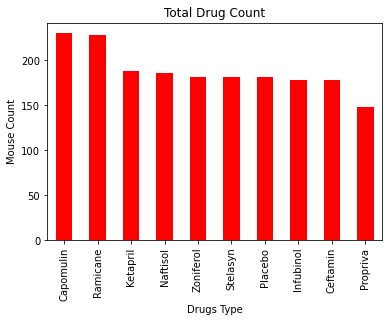

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
reduced_data = clean_data.loc[:,["Mouse ID","Tumor Volume (mm3)","Drug Regimen"]]

Mouse_count = reduced_data.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)
Mouse_count.plot(kind="bar",color="red")

#Formatting
plt.ylabel("Mouse Count")
plt.xlabel("Drugs Type")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()

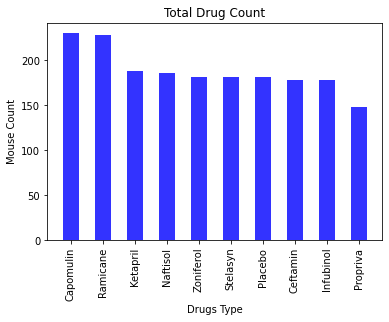

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
counts = reduced_data["Drug Regimen"].value_counts()
#Creating variables for my axis
y_axis=counts.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs=counts.index                
plt.bar(x_drugs, y_axis, color='b', alpha=0.8, align= "center", width=0.5)

#Formatting
plt.ylabel("Mouse Count")
plt.xlabel("Drugs Type")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()


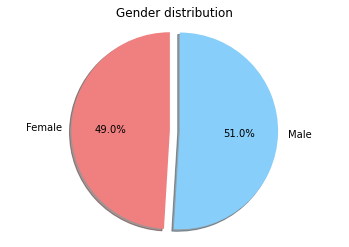

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_data = clean_data.loc[:,["Mouse ID","Sex"]]

Sex_count = Sex_data.groupby(["Sex"]).count()["Mouse ID"]

explode=[0.1,0]
colors=[ "lightcoral","lightskyblue"]
Sex_count.plot(kind="pie",explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#formatting
plt.title("Gender distribution")
plt.ylabel("")
plt.axis("equal")
plt.show() 



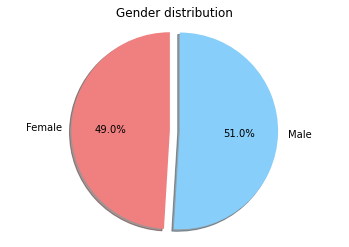

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_data = clean_data.loc[:,["Mouse ID","Sex"]]

Sex_count = Sex_data.groupby(["Sex"]).count()["Mouse ID"]
labels =Sex_count.index
sizes =Sex_count.values

colors=[ "lightcoral","lightskyblue"]

explode=[0.1,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
#formatting
plt.title("Gender distribution")
plt.ylabel("")
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_data.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_data = pd.merge(greatest_timepoint, clean_data,how='left',on =["Mouse ID","Timepoint"])
new_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin=[]
Ramicane=[]
Infubinol=[]
Ceftamin=[]

for treatment in treatments:
    Capomulin = new_data.loc[new_data['Drug Regimen'] == treatments[0],['Tumor Volume (mm3)','Mouse ID']]
    Ramicane = new_data.loc[new_data['Drug Regimen'] == treatments[1],['Tumor Volume (mm3)','Mouse ID']]
    Infubinol = new_data.loc[new_data['Drug Regimen'] == treatments[2],['Tumor Volume (mm3)','Mouse ID']]
    Ceftamin = new_data.loc[new_data['Drug Regimen'] == treatments[3],['Tumor Volume (mm3)','Mouse ID']]



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin
Capomulin_TV = Capomulin['Tumor Volume (mm3)']

cap_quartiles = Capomulin_TV.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)


#Ramicane
Ramicane_TV = Ramicane['Tumor Volume (mm3)']
ram_quartiles = Ramicane_TV.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

#Infubinol
Infubinol_TV = Infubinol['Tumor Volume (mm3)']
inf_quartiles = Infubinol_TV.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

#Ceftamin
Ceftamin_TV = Ceftamin['Tumor Volume (mm3)']
cef_quartiles = Ceftamin_TV.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)


    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
cap_outlier_lower = Capomulin.loc[Capomulin['Tumor Volume (mm3)'] < cap_lower_bound,["Mouse ID"]]
cap_outlier_upper = Capomulin.loc[Capomulin['Tumor Volume (mm3)'] > cap_upper_bound,["Mouse ID"]]

ram_outlier_lower =  Ramicane.loc[Ramicane['Tumor Volume (mm3)'] < ram_lower_bound,["Mouse ID"]]
ram_outlier_upper = Ramicane.loc[Ramicane['Tumor Volume (mm3)'] > ram_upper_bound,["Mouse ID"]]    

inf_outlier_lower =  Infubinol.loc[Infubinol['Tumor Volume (mm3)'] < inf_lower_bound,["Mouse ID"]]
inf_outlier_upper = Infubinol.loc[Infubinol['Tumor Volume (mm3)'] > inf_upper_bound,["Mouse ID"]]   

cef_outlier_lower = Ceftamin.loc[Ceftamin['Tumor Volume (mm3)'] < cef_lower_bound,["Mouse ID"]]
cef_outlier_upper = Ceftamin.loc[Ceftamin['Tumor Volume (mm3)'] > cef_upper_bound,["Mouse ID"]]       



    # Determine outliers using upper and lower bounds
print(f"The lower outliers of Capomulin are {cap_outlier_lower}")
print(f"upper outliers of Capomulin are {cap_outlier_upper}")
print(f"The lower outliers of Ramicane are {ram_outlier_lower}")
print(f"upper outliers of Ramicane are {ram_outlier_upper}")
print(f"The lower outliers of Infubinol are {inf_outlier_lower}")
print(f"upper outliers of Infubinol are {inf_outlier_upper}")
print(f"The lower outliers of Ceftamin are {cef_outlier_lower}")
print(f"upper outliers of Ceftamin are {cef_outlier_upper}")

The lower outliers of Capomulin are Empty DataFrame
Columns: [Mouse ID]
Index: []
upper outliers of Capomulin are Empty DataFrame
Columns: [Mouse ID]
Index: []
The lower outliers of Ramicane are Empty DataFrame
Columns: [Mouse ID]
Index: []
upper outliers of Ramicane are Empty DataFrame
Columns: [Mouse ID]
Index: []
The lower outliers of Infubinol are    Mouse ID
31     c326
upper outliers of Infubinol are Empty DataFrame
Columns: [Mouse ID]
Index: []
The lower outliers of Ceftamin are Empty DataFrame
Columns: [Mouse ID]
Index: []
upper outliers of Ceftamin are Empty DataFrame
Columns: [Mouse ID]
Index: []


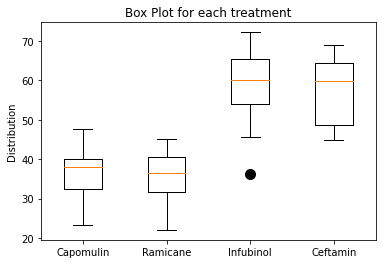

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot for each treatment')
ax1.set_ylabel('Distribution')
outliers = dict(markerfacecolor='black',markersize=10)
plt.boxplot([Capomulin_TV,Ramicane_TV, Infubinol_TV, Ceftamin_TV], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= outliers)
plt.show()


## Line and Scatter Plots

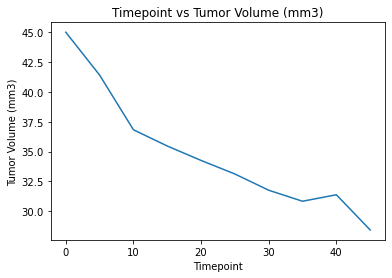

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_test_data= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']["Mouse ID"]
capomulin_test_data_unique=capomulin_test_data.unique()


mouse_sample= clean_data.loc[clean_data['Mouse ID'] == capomulin_test_data_unique[2]]


plt.plot(mouse_sample["Timepoint"], mouse_sample["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()


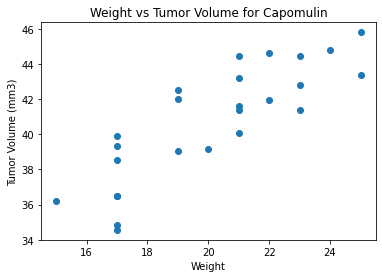

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight_data= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight_data.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

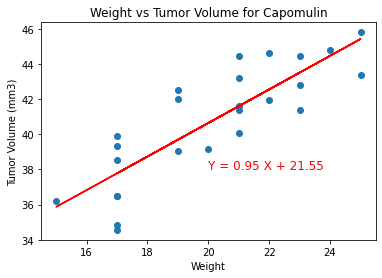

Correlation between these two variables is 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept,rvalue, pvalue, stderr= st.linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regression_line=cap_avg["Weight (g)"]* slope + intercept
line_fx= f"Y = {round(slope, 2)} X + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )

plt.plot(cap_avg["Weight (g)"],regression_line,color="red")
plt.annotate(line_fx,(20,38), color='red', fontsize=12)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


print(f"Correlation between these two variables is {round(rvalue,2)}")
